# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод**

In [117]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [118]:
#стаж, оплата/час, занятий в неделю
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [119]:
# количество баллов на ЕГЭ
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [120]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [121]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [122]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [123]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [124]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

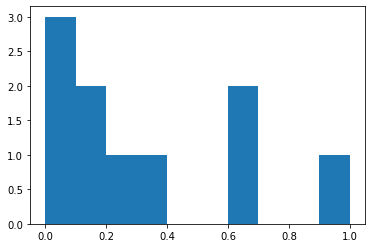

In [125]:
ind = 2
plt.hist(X_norm[:, ind])
plt.show()

In [126]:
# MSE
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [127]:
def gradient_descent_L2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
    return W

In [128]:
gradient_descent_L2(X_norm, y, iterations=3000, eta=1e-2, reg=1e-4)

array([43.92712263, 18.25466059,  6.11120032, 13.73470235])

In [129]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [130]:
from tqdm import tqdm

10it [00:01,  9.65it/s]


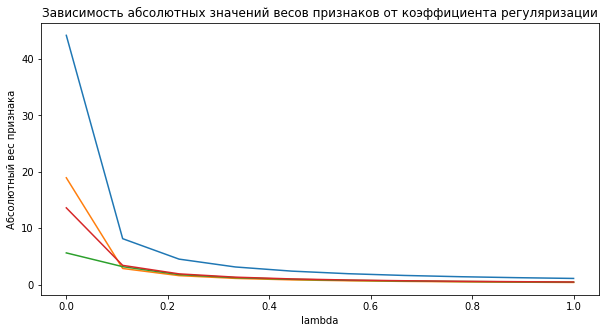

In [131]:
coeffs = np.zeros((n, X_norm.shape[1]))
lambda_list = np.linspace(0, 1, 10)

for i, val in tqdm(enumerate(lambda_list)):
    weights = gradient_descent_L2(X_norm, y, iterations=3000, eta=1e-2, reg=val)
    coeffs[i, :] = weights

plt.figure(figsize=(10, 5))
for i in range(X_norm.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])
    
plt.title('Зависимость абсолютных значений весов признаков от коэффициента регуляризации')
plt.xlabel('lambda')
plt.ylabel('Абсолютный вес признака');

Вывод: при увеличении коэффициентов, абсолютныe значения весов снижаются, т.е. регулизация штрафует модель за большие веса и не дает ей свободы в выборе больших весов

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [132]:
def gradient_descent_L1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [133]:
gradient_descent_L1(X_norm, y, iterations=20000, eta=1e-2, reg=1e-10)

Iter: 0, weights: [ 1.51695831  0.05852787  0.32352331 -0.82609868], error 3392.3571186475265
Iter: 2000, weights: [44.13096842 17.42875556  7.94183191 12.71630023], error 26.38835286804662
Iter: 4000, weights: [44.15070399 19.80052941  4.60461313 13.85287379], error 25.459590465530788
Iter: 6000, weights: [44.19413872 20.9006338   2.50025035 14.82214243], error 25.123773267825214
Iter: 8000, weights: [44.23187845 21.46826465  1.16884169 15.51695167], error 24.992454016729262
Iter: 10000, weights: [44.25910803 21.78649352  0.32513452 15.98359666], error 24.939959156199095
Iter: 12000, weights: [44.2774461  21.97493963 -0.20995085 16.28804421], error 24.918852216361167
Iter: 14000, weights: [44.28942548 22.09019173 -0.54944541 16.48394497], error 24.910352853703134
Iter: 16000, weights: [44.29713857 22.16194209 -0.76488886 16.60914588], error 24.906928994501605
Iter: 18000, weights: [44.30206955 22.20703249 -0.90162389 16.68889098], error 24.90554959885996
Final MSE: 24.904993856983218


array([44.30520952, 22.23549619, -0.98837559, 16.7395768 ])

Ошибка небольшая, веса меньше сделать не получилось

**3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Нормализация данных — метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. (шкала от 0 до 1)

Стандартизация — метод предобработки с целью приведения данных к единому формату и представлению. (М=0, std=1)

На уроке мы применили к данным:
1. Сначала стандартизацию потом нормализацию 
и
2. Сначала нормализацию потом стандартизацию
Эффект был или нулевой или давал совсем неадекватные данные.

Т.О. применить к одному и тому же признаку можно, но в этом нет никакого смысла, так как последняя опрерация перекроет предыдущую.


**4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [134]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=30000, n_features=15, n_informative=11, n_targets=1, 
                                      noise=3, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.79284677, -1.37660995,  0.48829114, ...,  0.10509317,
        -0.05168362,  0.32602807],
       [-1.30491104,  0.08187027, -0.50107062, ..., -1.01369762,
        -0.33530401, -0.60398263],
       [-0.12320972, -1.28476619,  2.31190813, ...,  2.42318908,
        -0.1271305 , -0.92358471],
       ...,
       [ 1.40323529, -0.59527101,  0.52290444, ..., -0.7825554 ,
        -0.92367879,  0.78554711],
       [ 0.59268588, -0.92560732,  0.09791752, ..., -0.58249607,
         0.5292829 ,  0.36014391],
       [ 1.31642048, -1.19433404, -1.61071301, ...,  2.14414277,
         0.3137607 , -0.00693388]])

array([ 178.95207395,   -2.5044235 , -101.91866904, ..., -126.69720735,
         16.0929961 ,  -94.01271587])

array([ 0.        , 62.40929274, 27.92393015, 82.63217137, 51.01617697,
        0.        ,  0.        ,  6.33610855, 11.08313671,  9.78196786,
       71.89725831, 90.82709564,  0.        , 80.80241961, 27.22383121])

In [135]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [136]:
X = standard_scale(X)

In [137]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind]) #делим на 1 обьект

        error = calc_mse(Y, np.dot(X, W)) #ошибку считаем по всем обьектам
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [138]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [139]:
%%time
# стохастический градиентный спуск
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 34764.13705720172
Iter: 500, error 5925.361373206216
Iter: 1000, error 709.4367922550872
Iter: 1500, error 123.00575284729314
Iter: 2000, error 25.75603081012921
Iter: 2500, error 13.10951990923858
Iter: 3000, error 10.775411036275456
Iter: 3500, error 10.38291814112458
Iter: 4000, error 10.231636273204698
Iter: 4500, error 10.337904541352154
Final MSE: 10.237501880118133
CPU times: user 1.83 s, sys: 22.6 ms, total: 1.85 s
Wall time: 944 ms


In [140]:
%%time
# классический  GD
weights_GD, errors_GD, w_list_GD = gradient_descent(X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 34899.20961346893
Iter: 500, error 4729.750771560411
Iter: 1000, error 649.1814857170425
Iter: 1500, error 96.73542224217863
Iter: 2000, error 21.870234522537963
Iter: 2500, error 11.714861942823767
Iter: 3000, error 10.335930412830036
Iter: 3500, error 10.14850632042041
Iter: 4000, error 10.123005804354674
Iter: 4500, error 10.11953269615589
Final MSE: 10.119059176094364
CPU times: user 9.92 s, sys: 1.14 s, total: 11.1 s
Wall time: 6.07 s


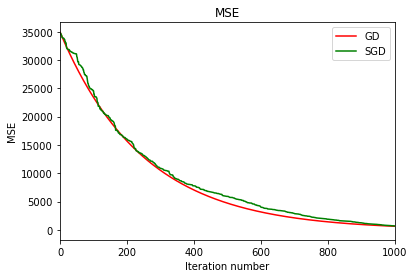

In [141]:
# Нанесите среднеквадратичную ошибку для обоих методов на один график
plt.plot(range(len(errors_GD)), errors_GD, color='r', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

стохастический градиентный спуск значительно выигрывает у классического градиентного спуска по скорости сходимости